<a href="https://colab.research.google.com/github/LicaCepillo/masterclass_eleicoes/blob/main/master_class_eleicoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Masterclass - Análise de dados Eleições Brasil 2020


In [1]:
# Neste projetoto será feita uma análise primeiramente Macro da situação, em seguida analisarei os Prefeitos e Vereadores
# Por fim apresentarei uma análise de comportamento

In [3]:
# importando as bibliotecas para o projeto
# Modelagem de dados
import pandas as pd
import numpy as np

# Libs Gráficas
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Configuração no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configuração do Matplot
plt.rcParams['figure.figsize']=(15,6)
plt.style.use('ggplot')


## Importação dos Dados

In [7]:
# Ler a base de dados
base_dados = pd.read_csv('/content/drive/MyDrive/datasets/clean_data.csv')

# Dimensão da Base
base_dados.shape

(518675, 29)

In [8]:
# Verificar os Dados
base_dados.head()

,Unnamed: 0,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


In [9]:
# Info - verificar os tipos nossos dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518675 entries, 0 to 518674
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  518675 non-null  int64  
 1   uf                          518675 non-null  object 
 2   type_id                     518675 non-null  int64  
 3   codigo_tse                  518675 non-null  int64  
 4   nome_municipio              518675 non-null  object 
 5   capital                     518675 non-null  int64  
 6   codigo_ibge                 518675 non-null  int64  
 7   job_count                   518675 non-null  int64  
 8   elector_count               518675 non-null  object 
 9   elector_presence            518675 non-null  int64  
 10  absentees                   518675 non-null  int64  
 11  nominal_votes               518675 non-null  int64  
 12  blank_votes                 518675 non-null  int64  
 13  total_null_vot

In [11]:
# Verificar nulos
base_dados.isnull().sum()

Unnamed: 0                        0
uf                                0
type_id                           0
codigo_tse                        0
nome_municipio                    0
capital                           0
codigo_ibge                       0
job_count                         0
elector_count                     0
elector_presence                  0
absentees                         0
nominal_votes                     0
blank_votes                       0
total_null_votes                  0
null_votes                        0
technical_null_votes              0
valid_votes                       0
nulled_votes                      0
judically_nulled_votes            0
vote_count                        0
candidate_number                  0
candidate_name                    3
candidate_coligation              0
candidate_vice_name               0
candidate_vote_destination        0
candidate_vote_count              0
legend_votes                  18640
job                         

In [12]:
# Verificar os campos únicos 
base_dados.nunique()


Unnamed: 0                    518675
uf                                26
type_id                            2
codigo_tse                      5568
nome_municipio                  5294
capital                            2
codigo_ibge                     5568
job_count                         33
elector_count                      2
elector_presence                4864
absentees                       3562
nominal_votes                   8361
blank_votes                     1784
total_null_votes                2194
null_votes                      2177
technical_null_votes             236
valid_votes                     8402
nulled_votes                      10
judically_nulled_votes          1046
vote_count                      4864
candidate_number               20334
candidate_name                394364
candidate_coligation            7941
candidate_vice_name            16997
candidate_vote_destination         4
candidate_vote_count            8730
legend_votes                    1736
j

In [14]:
# Retirar colunas que não precisaremos na base de dados
base_dados.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
# Verificando a alteração
base_dados.head()

,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


## Análise Macros

Prefeitos eleitos no país

In [19]:
from sys import base_exec_prefix
# Campos únicos
base_dados['job'].unique(), base_dados['elector_count'].unique()

(array(['prefeito', 'vereador'], dtype=object),
 array(['n', 's'], dtype=object))

In [21]:
# Filtro de todos os prefeitos eleitos na nossa base de dados
query_prefeitos = base_dados[
    (base_dados['job'] == 'prefeito') &
    (base_dados['elector_count'] == 's')
]

# Dimensão da base
query_prefeitos.shape

(5519, 28)

In [23]:
# Análise para saber quantos prefeitos cada partido elegeu
analise_1 = query_prefeitos.groupby( by= ['main_party']).agg(
    quantidade =('candidate_vote_count', 'count')
)

# Verificar
analise_1.head()

,quantidade
main_party,
AVANTE,82
CIDADANIA,141
DC,1
DEM,467
MDB,787


In [24]:
# Quantidade de prefeitos eleitos
qte_prefeitos_eleitos = analise_1['quantidade'].sum()

qte_prefeitos_eleitos

5519

In [29]:
# Verificar o percentual de prefeitos eleitos por partidos
analise_1['%']= analise_1['quantidade'] / qte_prefeitos_eleitos * 100
# gerando prcentagem com 2 casas decimais
analise_1['%'] = round( analise_1['%'],2)

# Ordenando informações
analise_1.sort_values('quantidade', inplace=True, ascending=False)

# Verificar
analise_1.head()



,quantidade,%
main_party,,
MDB,787,14.26
PP,687,12.45
PSD,660,11.96
PSDB,526,9.53
DEM,467,8.46


In [38]:
# Paleta de cores
sns.color_palette('magma',len(analise_1))

[(0.013708, 0.011771, 0.068667),
 (0.04383, 0.03383, 0.141886),
 (0.078815, 0.054184, 0.211667),
 (0.123833, 0.067295, 0.295879),
 (0.171713, 0.067305, 0.370771),
 (0.232077, 0.059889, 0.437695),
 (0.284951, 0.063168, 0.472451),
 (0.341482, 0.080564, 0.492631),
 (0.390384, 0.100379, 0.501864),
 (0.445163, 0.122724, 0.506901),
 (0.494258, 0.141462, 0.507988),
 (0.550287, 0.161158, 0.505719),
 (0.600868, 0.177743, 0.500394),
 (0.658483, 0.196027, 0.490253),
 (0.716387, 0.214982, 0.47529),
 (0.767398, 0.233705, 0.457755),
 (0.822926, 0.259016, 0.433573),
 (0.868793, 0.287728, 0.409303),
 (0.913354, 0.330052, 0.382563),
 (0.944006, 0.377643, 0.365136),
 (0.967671, 0.439703, 0.35981),
 (0.981, 0.498428, 0.369734),
 (0.990138, 0.565296, 0.395122),
 (0.994738, 0.62435, 0.427397),
 (0.997077, 0.690088, 0.471811),
 (0.997228, 0.747981, 0.516859),
 (0.99568, 0.812706, 0.572645),
 (0.99317, 0.870024, 0.626189),
 (0.989815, 0.934329, 0.690198)]

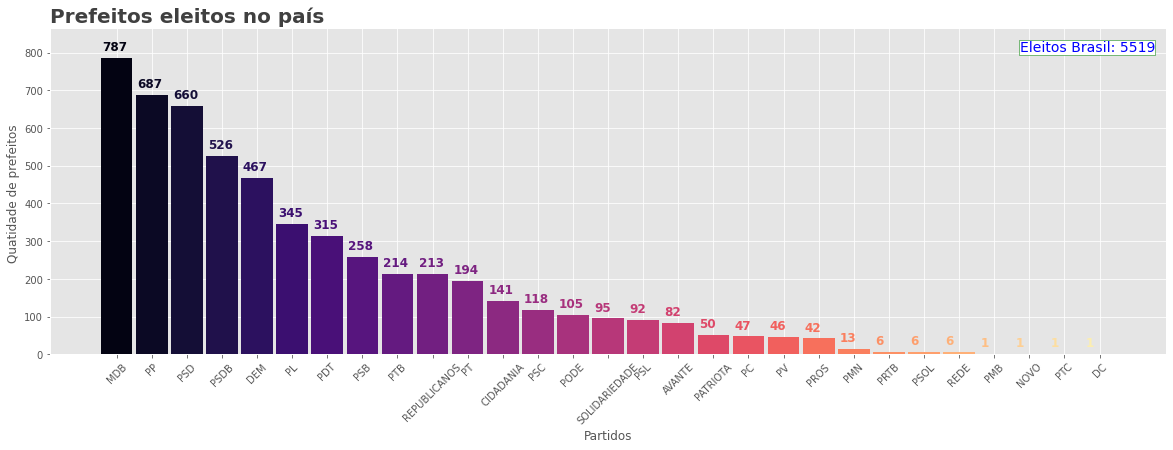

In [112]:
from matplotlib.patches import BoxStyle
# Tamanho
plt.figure( figsize=(20,6))

# Paleta
paleta_cores = sns.color_palette('magma',len(analise_1))

# Plot
plt.bar(
    analise_1.index, 
    analise_1['quantidade'],
    width=0.9,
    color=paleta_cores
    )
# Título
plt.title('Prefeitos eleitos no país', loc='left', fontsize=20, color='#404040', fontweight=600 )

# Labels
plt.ylabel('Quatidade de prefeitos ')
plt.xlabel('Partidos')
plt.xticks( rotation=45)

#Ajustando escala do gráfico

plt.ylim(0, analise_1['quantidade'].max() + (analise_1['quantidade'].max() *0.1))

# Incluindo dados no gráfico

for Posicao, Valor in enumerate( analise_1['quantidade']):
  plt.text(
      #posiçao do gráfico (x,y)
      Posicao -0.4, Valor +20,
      #Valor no gráfico
      Valor,
      #Paleta
      color=paleta_cores[Posicao],
      #Tamanho
      size=12,
      #expessura de fonte
      fontweight=700
  )
#Total de eleitos
total_eleitos = analise_1['quantidade'].sum()

# Info complementar
plt.annotate(
      f'Eleitos Brasil: {total_eleitos}',
      xy=(0.99,0.94),
      xycoords='axes fraction',
      ha='right',
      va= 'center',
      color='blue',
      fontsize=14,
      fontweight=500,
      bbox= dict(facecolor='#ffffff', edgecolor='green', BoxStyle='round', pad=0.25)
  );

Vereadores eleitos no país

In [75]:
# Filtros para vereadores

query_vereadores = base_dados[
    (base_dados['job'] == 'vereador') &
    (base_dados['elector_count'] == 's')
]
query_vereadores.shape

(57866, 28)

In [87]:
# Análise para saber quantos vereadores cada partido elegeu
analise_2 = query_vereadores.groupby( by= ['main_party']).agg(
    quantidade =('candidate_vote_count', 'count')
)

# Verificar
analise_2.head()

,quantidade
main_party,
AVANTE,1046
CIDADANIA,1583
DC,121
DEM,4335
MDB,7311


In [88]:
# Quantidade de Vereadores eleitos
qtde_vereadores_eleitos= analise_2['quantidade'].sum()

qtde_vereadores_eleitos

57866

In [91]:
# Gerando %
analise_2['%'] =analise_2['quantidade'] / qtde_vereadores_eleitos * 100
analise_2['%'] =round( analise_2['%'], 2)

# Ordenar
analise_2.sort_values('quantidade', inplace= True, ascending= False)

# Verificar
analise_2.head()

,quantidade,%
main_party,,
MDB,7311,12.63
PP,6331,10.94
PSD,5676,9.81
PSDB,4368,7.55
DEM,4335,7.49


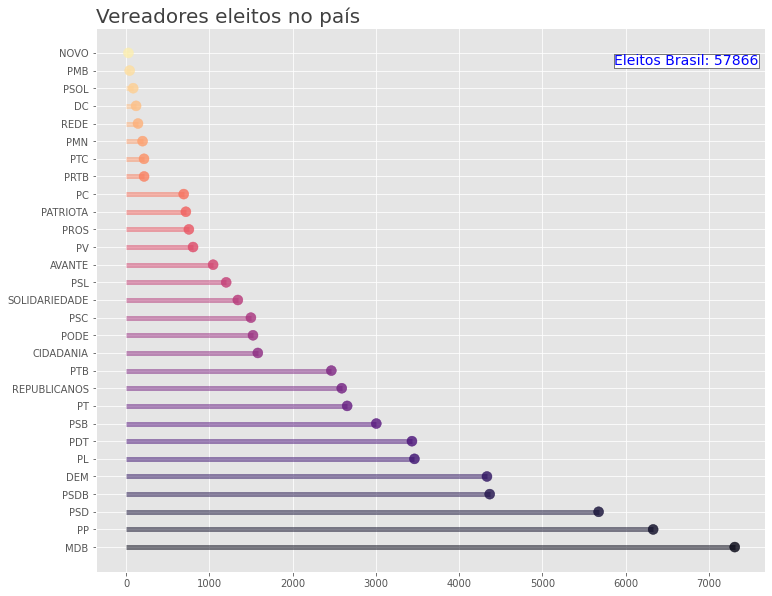

In [111]:
# Tamanho 
plt.figure( figsize=(12,10))

# Gráficos para vereadores
# Plot das linhas 
plt.hlines(
    #Dados 
    y=analise_2.index, 
    xmin=0, 
    xmax=analise_2['quantidade'],
    # Espessura da lina
    lw=5,
    # Paleta
    color=paleta_cores,
    # transparência
    alpha=0.5   
)
# Plot dos pontos
plt.scatter(
    analise_2['quantidade'],
    analise_2.index,
    # Tamanho do ponto
    s=100,
    # Cor do ponto
    color=paleta_cores,
    # Transparência
    alpha=0.8,
)
plt.title('Vereadores eleitos no país', loc='left', fontsize=20, color='#404040', fontweight=500);

#Total de eleitos
total_eleitos = analise_2['quantidade'].sum()

# Info complementar
plt.annotate(
      f'Eleitos Brasil: {total_eleitos}',
      xy=(0.99,0.94),
      xycoords='axes fraction',
      ha='right',
      va= 'center',
      color='blue',
      fontsize=14,
      fontweight=500,
      bbox= dict(facecolor='#ffffff', edgecolor='black', BoxStyle='round', pad=0.25)
  );



### Análise de Correlação

Plot Tridimensional